In [1]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib
import scipy.stats as stats

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [5]:
df.shape

(2000, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

All numarical variables

In [7]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
#missing values

# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
# determine percentage of missing values
df[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

All data is present

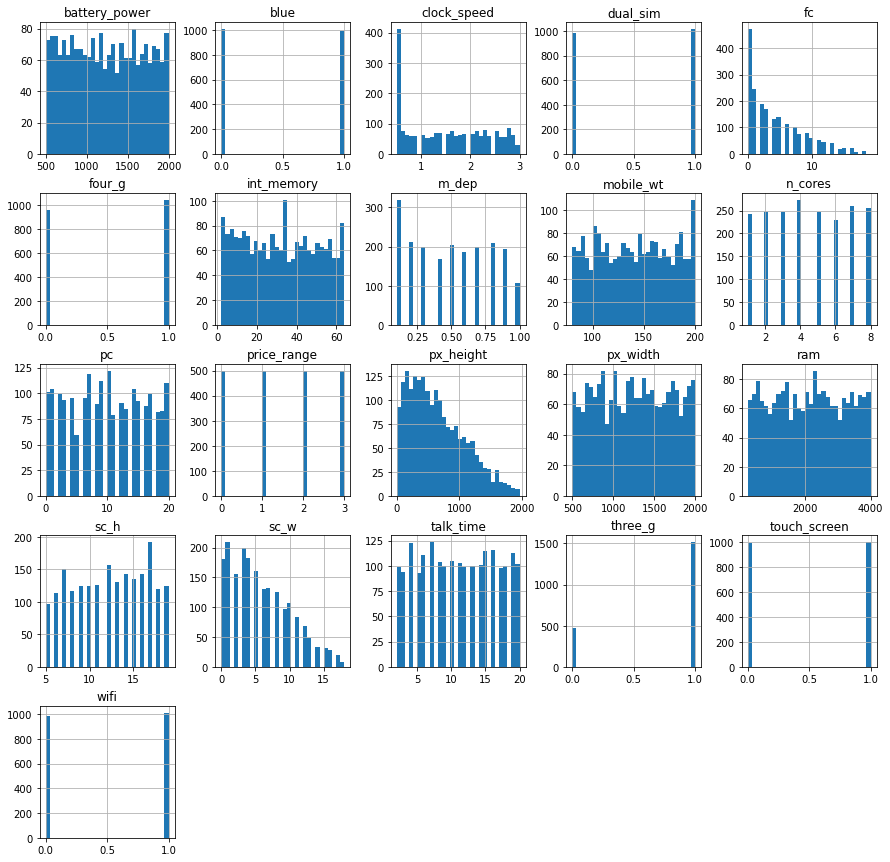

In [9]:
# get distributions  

df.hist(bins=30, figsize=(15,15))
plt.show()

In [10]:
def boxplt(data, col):
    plt.boxplot(data[col])
    plt.show()

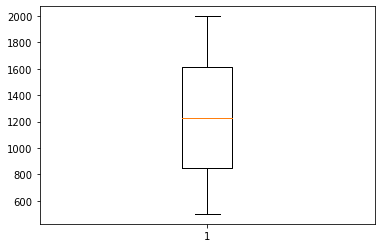

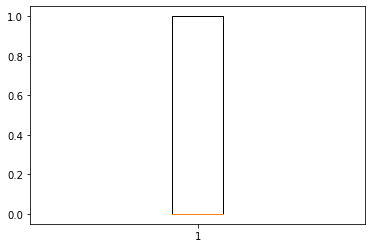

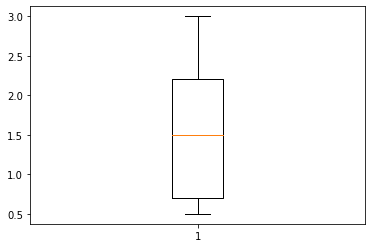

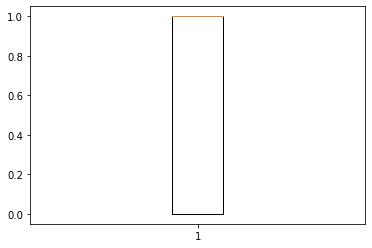

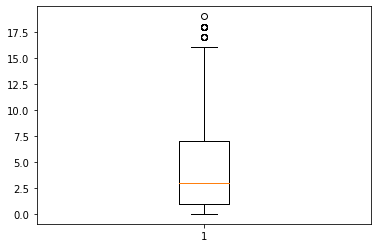

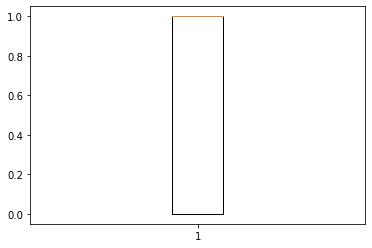

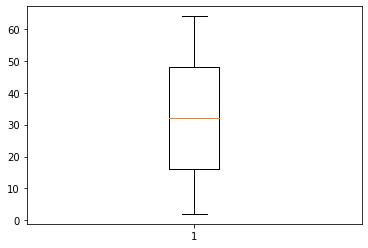

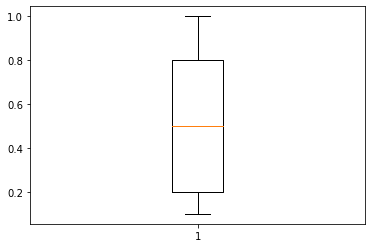

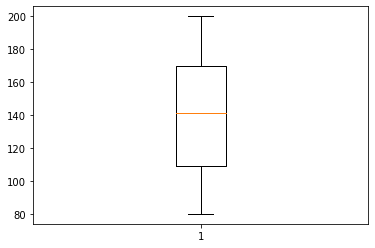

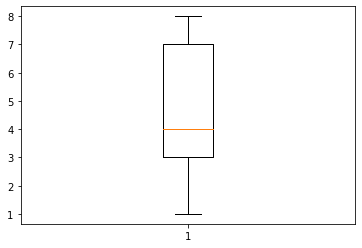

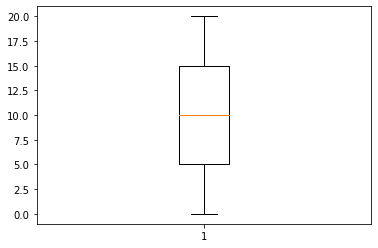

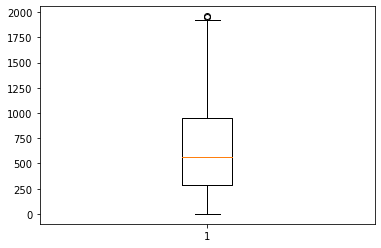

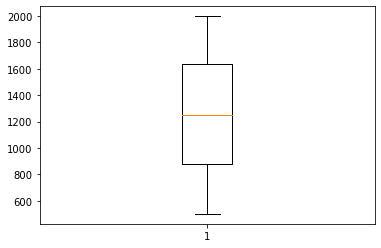

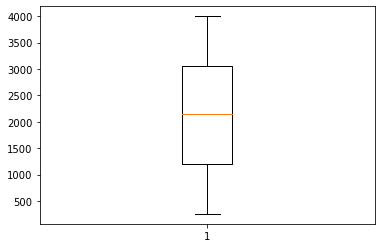

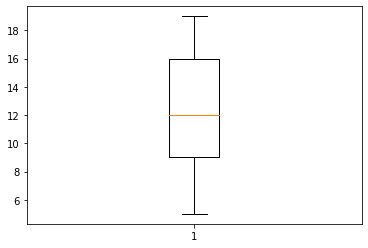

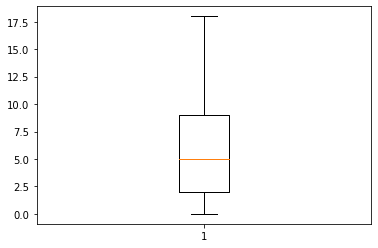

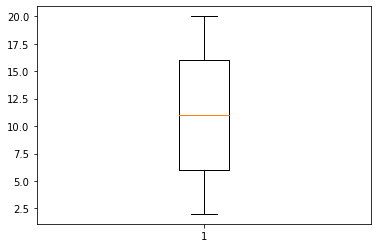

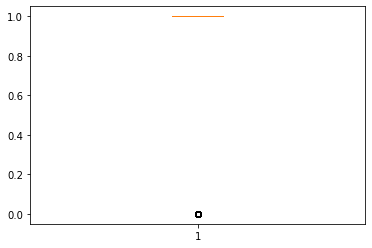

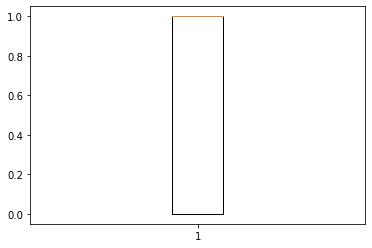

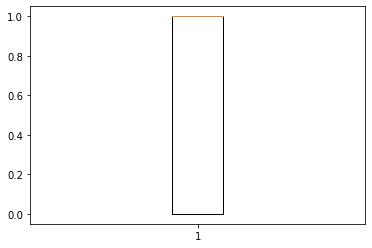

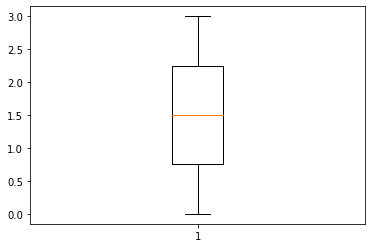

In [11]:
for col in df.columns:
    boxplt(df, col)

In [12]:
def get_log(col):
    plt.hist(np.log(df[col].values))
    plt.show()

In [13]:
binary = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
discrete_vars = ['fc', 'n_cores', 'pc', 'ram', 'sc_h', 'sc_w', 'talk_time']
continue_vars = ['clock_speed', 'battery_power', 'battery_power', 'm_dep', 'mobile_wt', 'px_height', 
                'px_width', 'ram']
target = ['price_range']

In [14]:
cat_na = [var for var in df.columns if var not in binary]

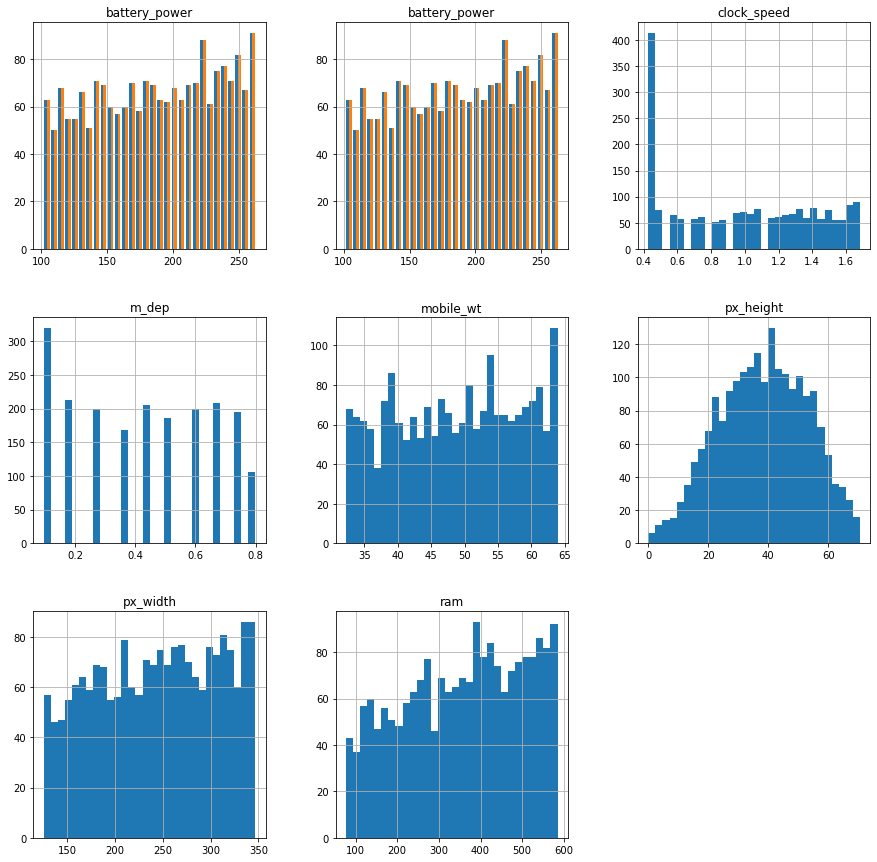

In [15]:
# temporary copy of the data
tmp = df.copy()

for var in continue_vars:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(df[var])

    
# plot the histograms of the transformed variables
tmp[continue_vars].hist(bins=30, figsize=(15,15))
plt.show()

yeojohnson on px_hight

In [16]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


for feature eng

drop label

yeojohnson to px_height

then use Normalization

In [19]:
train_y = df['price_range']
df = df.drop('price_range', axis=1)

In [18]:
df['px_height'], param = stats.yeojohnson(df['px_height'])
df_test['px_height'], param = stats.yeojohnson(df_test['px_height'])

In [20]:
scaler = StandardScaler()

#  fit  the scaler to the train set
scaler.fit(df)
scaler.fit(df_test) 

StandardScaler()

In [22]:
# save the train and test sets for the next notebook

df.to_csv('data/xtrain.csv', index=False)
df_test.to_csv('data/xtest.csv', index=False)

train_y.to_csv('data/ytrain.csv', index=False)

# save the scaler
joblib.dump(scaler, 'data/minmax_scaler.joblib')   

['data/minmax_scaler.joblib']